In [5]:
import os
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
from collections import Counter

# 데이터셋 경로 설정 및 불러오기
trainset_path = 'C:/Users/jongcheol/OneDrive/바탕 화면/Semester2/train_data'  # 경로 변경
trainset = datasets.ImageFolder(root=trainset_path)

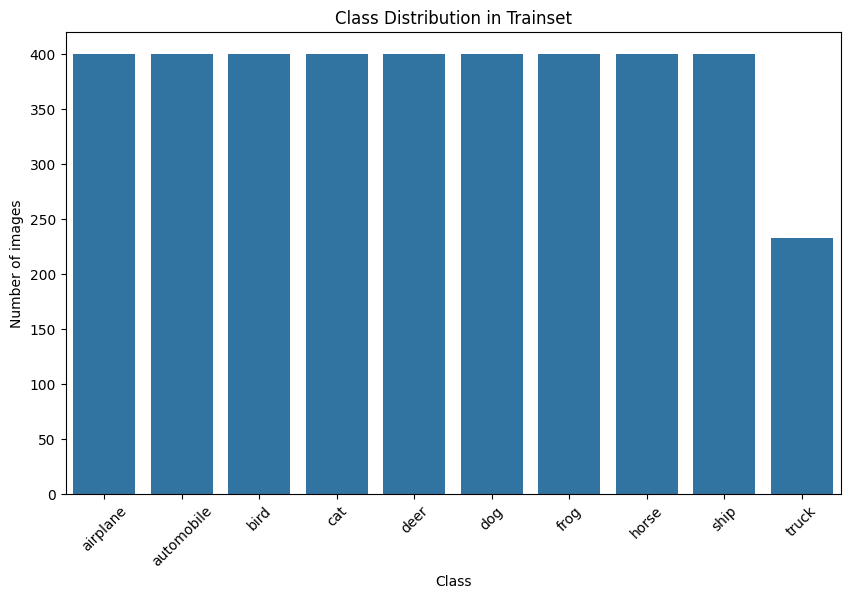

In [6]:
# 클래스별 샘플 수 확인
labels = [label for _, label in trainset.imgs]
class_counts = Counter(labels)

# 클래스 이름 불러오기
class_names = trainset.classes

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Class Distribution in Trainset")
plt.show()


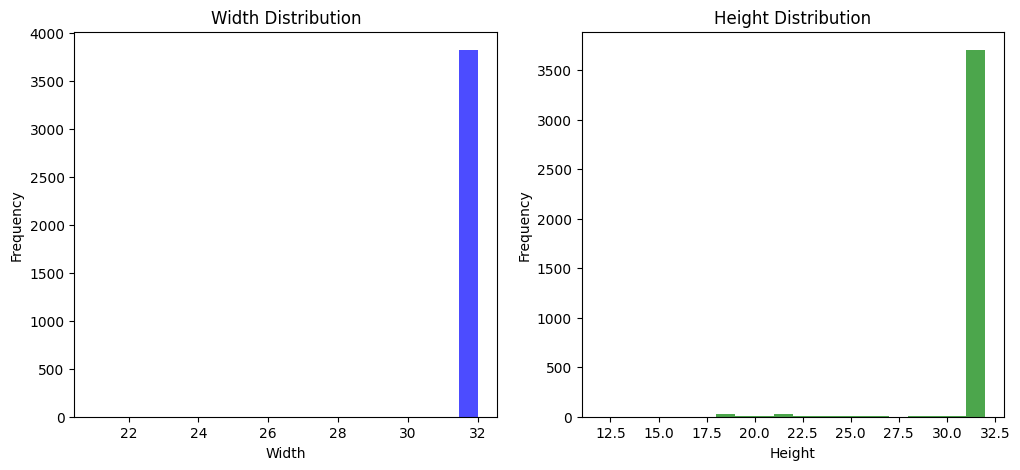

In [7]:
# 이미지 크기 분포 확인
image_shapes = [Image.open(file).size for file, _ in trainset.imgs]
widths, heights = zip(*image_shapes)

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.title("Width Distribution")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Height Distribution")
plt.show()

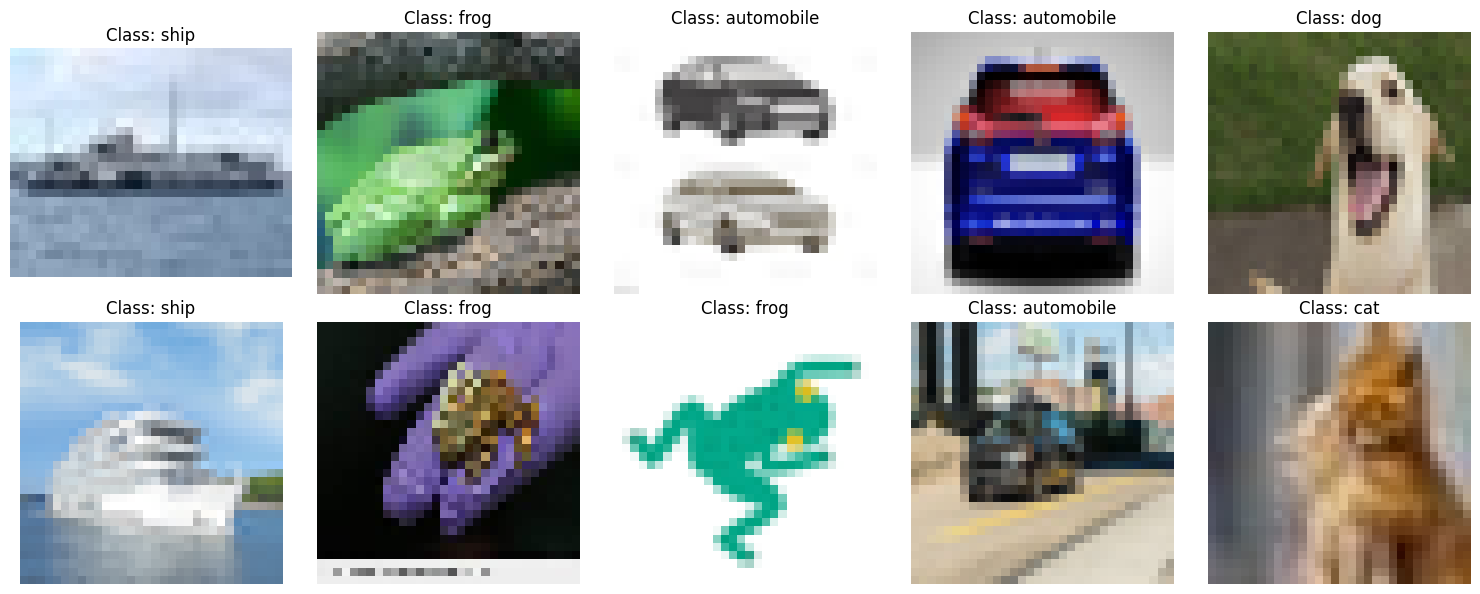

In [9]:
# 샘플 이미지 시각화
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
sample_indices = np.random.choice(len(trainset), 10, replace=False)  # 데이터셋의 인덱스를 참조

for i, idx in enumerate(sample_indices):
    img_path, label = trainset.imgs[idx]  # 선택된 인덱스로 이미지와 레이블을 불러옴
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Class: {trainset.classes[label]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

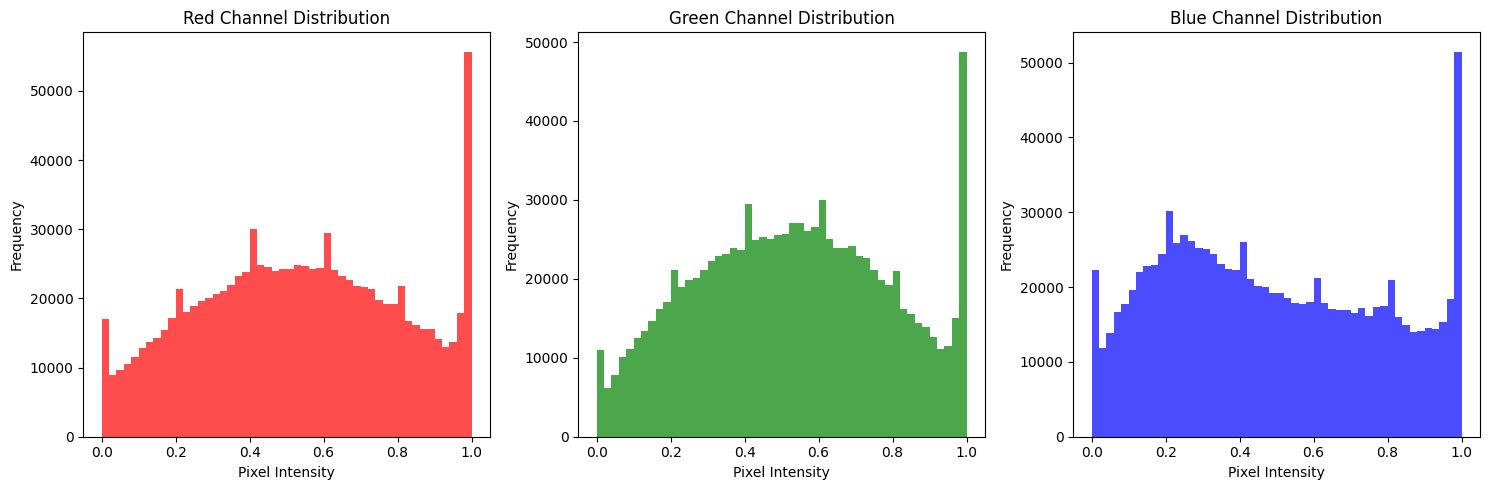

In [ ]:
# 채널별 색상 분포 확인
transform = transforms.ToTensor()  # 이미지를 텐서로 변환

# 각 채널별 픽셀 값을 누적하여 분포 계산
red_vals, green_vals, blue_vals = [], [], []
sample_indices = np.random.choice(len(trainset), 1000, replace=False)  # 임의로 100개의 인덱스 선택

for idx in sample_indices:
    img_path, _ = trainset.imgs[idx]  # 선택된 인덱스로 이미지 경로 불러오기
    img = Image.open(img_path)
    img_tensor = transform(img)
    
    # 각 채널별 픽셀 값 누적
    red_vals.extend(img_tensor[0].flatten().numpy())
    green_vals.extend(img_tensor[1].flatten().numpy())
    blue_vals.extend(img_tensor[2].flatten().numpy())

# 히스토그램 시각화 (각 채널을 개별 그래프로 표시)
plt.figure(figsize=(15, 5))

# Red 채널
plt.subplot(1, 3, 1)
plt.hist(red_vals, bins=50, color='red', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Red Channel Distribution")

# Green 채널
plt.subplot(1, 3, 2)
plt.hist(green_vals, bins=50, color='green', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Green Channel Distribution")

# Blue 채널
plt.subplot(1, 3, 3)
plt.hist(blue_vals, bins=50, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Blue Channel Distribution")

plt.tight_layout()
plt.show()

In [20]:
print(f"Total number of images: {len(trainset)}")
print(f"Number of classes: {len(class_names)}")
print("Class names:", class_names)
print(f"Image size range - Width: {min(widths)} to {max(widths)}, Height: {min(heights)} to {max(heights)}")

Total number of images: 3833
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Image size range - Width: 21 to 32, Height: 12 to 32
